In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Plotting a barchart

In [2]:
plt.bar(x=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], height=[2, 2, 8, 1, 4, 3], tick_label=['dacia', 'mazda', 'toyota', 'VW', 'mercedes', 'BMW'])
plt.tick_params(axis='x', length=0)
plt.show()

## Plotting a histogram from values

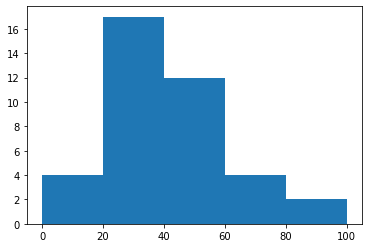

In [3]:
plt.hist([3,5,7,17,21,21,23,25,25,28,30,31,32,33,33,33,34,36,37,38,39,41,44,44,45,47,49,
50,50,52,55,56,57,62,66,70,76,84,91], bins=[0, 20, 40, 60, 80, 100])
plt.show()

## Plotting a histogram from a frequency table 

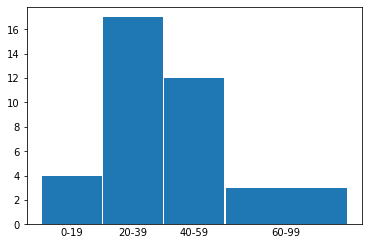

In [4]:
plt.tick_params(axis='x', length=0)
plt.bar(x=[0.5, 1.5, 2.5, 4], height=[4,17,12,3], width=[0.98, 0.98, 0.98, 1.98], tick_label=['0-19','20-39','40-59', '60-99'])
plt.show()

## Importing a dataset

In [6]:
ind_food = pd.read_csv("ld_indian_food_kaggle.csv")

In [7]:
ind_food.shape

(255, 9)

In [8]:
type(ind_food)

pandas.core.frame.DataFrame

In [9]:
ind_food

name                                        ingredients  \
0        Balu shahi                    Maida flour, yogurt, oil, sugar   
1            Boondi                            Gram flour, ghee, sugar   
2    Gajar ka halwa       Carrots, milk, sugar, ghee, cashews, raisins   
3            Ghevar  Flour, ghee, kewra, milk, clarified butter, su...   
4       Gulab jamun  Milk powder, plain flour, baking powder, ghee,...   
..              ...                                                ...   
250       Til Pitha            Glutinous rice, black sesame seeds, gur   
251         Bebinca  Coconut milk, egg yolks, clarified butter, all...   
252          Shufta  Cottage cheese, dry dates, dried rose petals, ...   
253       Mawa Bati  Milk powder, dry fruits, arrowroot powder, all...   
254          Pinaca  Brown rice, fennel seeds, grated coconut, blac...   

           diet  prep_time  cook_time flavor_profile   course  \
0    vegetarian         45         25          sweet  dessert   
1    vegetarian         80         30          sweet  dessert   
2    vegetarian         15         60          sweet  dessert   
3    vegetarian         15         30          sweet  dessert   
4    vegetarian         15         40          sweet  dessert   
..          ...        ...        ...            ...      ...   
250  vegetarian          5         30          sweet  dessert   
251  vegetarian         20         60          sweet  dessert   
252  vegetarian         -1         -1          sweet  dessert   
253  vegetarian         20         45          sweet  dessert   
254  vegetarian         -1         -1          sweet  dessert   

               state      region  
0        West Bengal        East  
1          Rajasthan        West  
2             Punjab       North  
3          Rajasthan        West  
4        West Bengal        East  
..               ...         ...  
250            Assam  North East  
251              Goa        West  
252  Jammu & Kashmir       North  
253   Madhya Pradesh     Central  
254              Goa        West  

[255 rows x 9 columns]

## Min-max normalisation

Prepare the dataframe by removing NaNs

In [10]:
ind_food_no_nans = ind_food[np.logical_and(ind_food['cook_time'] != -1, ind_food['prep_time'] != -1)]
ind_food_no_nans.shape

(225, 9)

Have a look at the histogram for the cook time

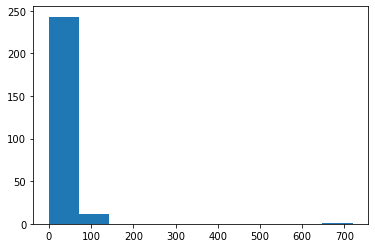

In [11]:
plt.hist(ind_food['cook_time'])
plt.show()

Remove outlier

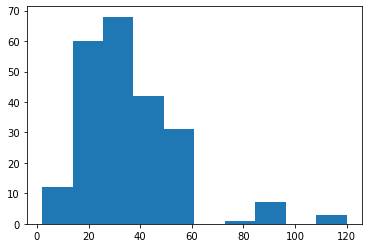

In [12]:
ind_food_cln = ind_food_no_nans[ind_food_no_nans['cook_time'] < 200]
plt.hist(ind_food_cln['cook_time'])
plt.show()

Have a look at the histogram for the prep time

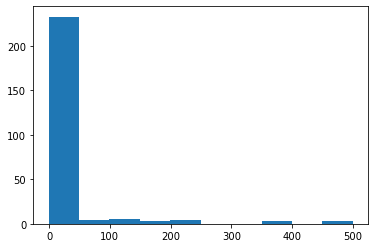

In [13]:
plt.hist(ind_food['prep_time'])
plt.show()

Prepare the min and max values

In [14]:
min_ct_n = 0
max_ct_n = 1
min_ct_o = min(ind_food_cln['cook_time'])
max_ct_o = max(ind_food_cln['cook_time'])

Normalise

In [15]:
ct_normalised = (ind_food_cln['cook_time'] - min_ct_o)/(max_ct_o - min_ct_o)*(max_ct_n - min_ct_n) + min_ct_n
plt.hist(ct_normalised)
plt.show()

In [16]:
min_pt_n = 0
max_pt_n = 1
min_pt_o = min(ind_food_cln['prep_time'])
max_pt_o = max(ind_food_cln['prep_time'])
pt_normalised = (ind_food_cln['prep_time'] - min_pt_o)/(max_pt_o - min_pt_o)*(max_pt_n - min_pt_n) + min_pt_n

## Plotting a box-and-whisker diagram

In [17]:
plt.boxplot([ct_normalised, pt_normalised], labels=["cook", "prep"])
plt.show()

## Measures of central tendency

In [18]:
import statistics as sts
data = [3,5,7,17,21,21,23,25,25,28,30,31,32,33,33,33,34,36,37,38,39,41,44,44,45,47,49,
50,50,52,55,56,57,62,66,70,76,84,91]

In [19]:
sts.mean(data)

40.76923076923077

In [20]:
sts.median(data)

38

In [21]:
sts.mode(data)

33

## Measures of spread (variation)

Range

In [22]:
range = max(data) - min(data)
range

88

Inter-quartile range

In [24]:
quartiles = sts.quantiles(data, n=4)
q1 = quartiles[0]
q2 = quartiles[1]
q3 = quartiles[2]
iqr = q3 - q1
iqr

24.0

Population variance and standard deviation

In [28]:
sts.pvariance(data), sts.pstdev(data)

(396.0749506903353, 19.90163185998413)

Sample variance and standard deviation

In [29]:
sts.variance(data), sts.stdev(data)

(406.497975708502, 20.16179495254582)